# Turkish Spam Data Set Classification with KNN

## Importing Modules

In this project, we're using Python3 and its data-mining modules for developing a machine learning model.
- string module for list of punctuation.
- csv module for reading data set.
- numpy and pandas for advance array manipulation.
- matplotlib to draw various plots.
- train_test_split to split the data into training and test data.
- accuracy_score to calculate accuracy of algorithms.

In [1]:
# import modules
import string
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## The KNN Algorithm

K-Nearest Neighbours (KNN) is a simple supervised learning algorithm that differs from traditional ones, like the Multinomial Naive Bayes algorithm. Unlike these, KNN doesn't have a separate training stage followed by a prediction stage. Instead, when dealing with a test data item, KNN compares its features with the features of every training data item in real time. The algorithm then selects the K nearest training data items, based on their feature similarity, and assigns the most frequent class among them to the test data item.

For instance, in email classification (spam or ham), KNN compares the word frequencies of each email. The algorithm uses the Euclidean distance to measure the similarity between two emails. The closer the distance, the more alike they are.

In [2]:
# The KNN Algorithm
def get_count(text):
    wordCounts = dict()
    for word in text.split():
        if word in wordCounts:
            wordCounts[word] += 1
        else:
            wordCounts[word] = 1
    
    return wordCounts

def euclidean_difference(test_WordCounts, training_WordCounts):
    total = 0
    for word in test_WordCounts:
        if word in test_WordCounts and word in training_WordCounts:
            total += (test_WordCounts[word] - training_WordCounts[word])**2
            del training_WordCounts[word]
        else:
            total += test_WordCounts[word]**2

    for word in training_WordCounts:
        total += training_WordCounts[word]**2
    return total**0.5

def get_class(selected_Kvalues):
    spam_count = 0
    ham_count = 0
    for value in selected_Kvalues:
        if value[0] == "spam":
            spam_count += 1
        else:
            ham_count += 1
    if spam_count > ham_count:
        return "spam"
    else:
        return "ham"
    
def knn_classifier(training_data, training_labels, test_data, K, tsize):
    print("Running KNN Classifier...")
    
    result = []
    counter = 1
    # word counts for training email
    training_WordCounts = [] 
    for training_text in training_data:
            training_WordCounts.append(get_count(training_text))
    for test_text in test_data:
        similarity = [] # List of euclidean distances
        test_WordCounts = get_count(test_text)  # word counts for test email
        # Getting euclidean difference 
        for index in range(len(training_data)):
            euclidean_diff =\
                euclidean_difference(test_WordCounts, training_WordCounts[index])
            similarity.append([training_labels[index], euclidean_diff])
        # Sort list in ascending order based on euclidean difference
        similarity = sorted(similarity, key = lambda i:i[1])
        # Select K nearest neighbours
        selected_Kvalues = [] 
        for i in range(K):
            selected_Kvalues.append(similarity[i])
        # Predicting the class of email
        result.append(get_class(selected_Kvalues))
    return result

## Loading Data

The E-mail data set is obtained from "Turkish Spam V01 Data Set". It can be found at https://archive.ics.uci.edu/ml/datasets/Turkish+Spam+V01 The data set contains 825 emails and consists of a single csv file.

In [3]:
# Loading the Data
print("Loading data...")
data = []
with open("trspam.csv", "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        label = str(row[-1])
        del row[-1]
        text = ''.join(row)
        
        data.append([text, label])
del data[0]
del data[-1]
data = np.array(data)

# data count
len(data)

Loading data...


825

## Pre-Processing

Data pre-processing is a critical step in data analysis and machine learning as it helps to ensure that the data is accurate, consistent, and useful for further analysis. We will clean, transform, and organize the data.

punc holds a list of punctuation and symbols.
sw holds a list of stopwords.

For every record in data, for every item (symbol or punctuation) in punc, replace the item with an empty string, to delete the item from email text string.

And than, iterate over list of words, and if the word is not in stopwords list, set it to lowercase, and add the word to newText. newText will contain the email but empty of stopwords. newText is assigned back to record. After every record is preprocessed.

In [4]:
# Data Pre-Processing
print("Preprocessing data...")
punc = string.punctuation       # Punctuation list

with open("stopwords-tr.txt", "r", encoding="utf-8") as f:
    sw = f.read().splitlines()

for record in data:
        # Remove common punctuation and symbols
        for item in punc:
            record[0] = record[0].replace(item, "")
        # Split text to words
        splittedWords = record[0].split()
        newText = ""
        # Lowercase all letters and remove stopwords 
        for word in splittedWords:
            if word not in sw:
                word = word.lower()
                newText = newText + " " + word      
        record[0] = newText

Preprocessing data...


## Data Visualization

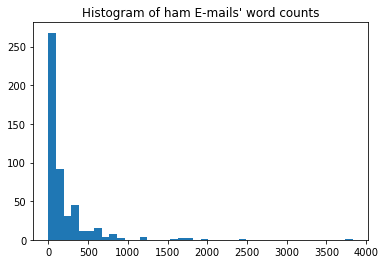

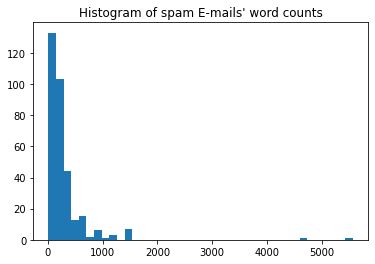

In [5]:
# Histogram By Word Count
count_ham_list=[]
count_spam_list=[]
for record in data:
    word_count = len(record[0].split())
    if record[1] == "ham":
        count_ham_list.append(word_count)
    else:
        count_spam_list.append(word_count)
        
plt.title("Histogram of ham E-mails' word counts")
plt.hist(count_ham_list, bins=40)
plt.show()

plt.title("Histogram of spam E-mails' word counts")
plt.hist(count_spam_list, bins=40)
plt.show()

In [6]:
# Calculate Word Frequency
frequency_ham_word_list=[]
frequency_ham_count_list=[]

frequency_spam_word_list=[]
frequency_spam_count_list=[]

for record in data:
    words = record[0].split()
    if record[1] == "ham":     
        for word in words:
            if word in frequency_ham_word_list:
                index = frequency_ham_word_list.index(word)
                frequency_ham_count_list[index] += 1
            else:
                frequency_ham_word_list.append(word)
                frequency_ham_count_list.append(1)
    else:
        for word in words:
            if word in frequency_spam_word_list:
                index = frequency_spam_word_list.index(word)
                frequency_spam_count_list[index] += 1
            else:
                frequency_spam_word_list.append(word)
                frequency_spam_count_list.append(1)
    


In [7]:
# Simplify Word Frequency
index = len(frequency_ham_count_list) - 1
while(index > 0):
    count = frequency_ham_count_list[index]
    if count < 100 or count > 150:
        del(frequency_ham_count_list[index])
        del(frequency_ham_word_list[index])
    index -= 1
    
index = len(frequency_spam_count_list) - 1
while(index > 0):
    count = frequency_spam_count_list[index]
    if count < 100 or count > 150:
        del(frequency_spam_count_list[index])
        del(frequency_spam_word_list[index])
    index -= 1
    
print(len(frequency_ham_count_list))


print(len(frequency_spam_word_list))


20
43


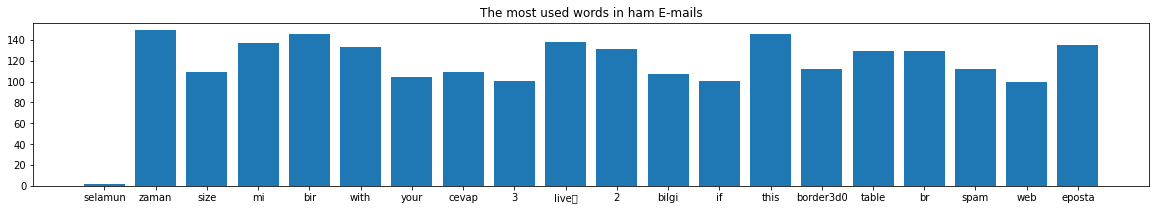

['selamun', 'zaman', 'size', 'mi', 'bir', 'with', 'your', 'cevap', '3', 'live\x99', '2', 'bilgi', 'if', 'this', 'border3d0', 'table', 'br', 'spam', 'web', 'eposta']


In [19]:
# The most used words in ham E-Mails 
plt.title("The most used words in ham E-mails")
plt.rcParams["figure.figsize"] = (20,3)
plt.bar(frequency_ham_word_list, frequency_ham_count_list)
plt.show()
print(frequency_ham_word_list)

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


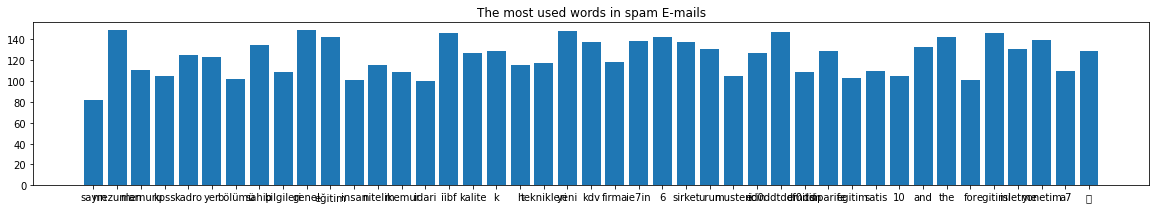

['sayın', 'mezunları', 'memuru', 'kpss', 'kadro', 'yer', 'bölümü', 'sahip', 'bilgileri', 'genel', 'eğitim', 'insan', 'nitelik', 'memur', 'i̇dari', 'i̇i̇bf', 'kalite', 'k', 'h', 'teknikleri', 'yeni', 'kdv', 'firma', 'ie7in', '6', 'sirket', 'urun', 'musteri', 'icin', 'ed0ddtddmdd', 'ef0itim', 'siparife', 'egitim', 'satis', '10', 'and', 'the', 'for', 'egitimi', 'isletme', 'yonetim', 'a7', '\x03']


In [17]:
# The most used words in spam E-Mails 
plt.title("The most used words in spam E-mails")
plt.rcParams["figure.figsize"] = (20,3)
plt.bar(frequency_spam_word_list, frequency_spam_count_list)
plt.show()
print(frequency_spam_word_list)

## Determine Train and Test Set

The data set splits into a training set (70%) and a testing set (30%). We use "train_test_split" for that.

In [10]:
# Splitting the Data into Training and Testing Sets
print("Splitting data...")
features = data[:, 0]   # array containing all email text bodies
labels = data[:, 1]     # array containing corresponding labels
training_data, test_data, training_labels, test_labels =\
train_test_split(features, labels, test_size = 0.30, random_state = 42)

Splitting data...


## The KNN Model

The model takes a K value. Next, it trains and tests .

In [11]:
# Determine Test Size
tsize = len(test_data)

In [12]:
# Declare K Value
K = 24

In [13]:
# Model Training
print("Model Training...")
result = knn_classifier(training_data, training_labels, test_data[:tsize], K, tsize) 

Model Training...
Running KNN Classifier...


In [14]:
# Model Test
print("Model Testing...")
accuracy = accuracy_score(test_labels[:tsize], result)

Model Testing...


## Results 

Present the model details and test results.

In [15]:
# Results
print("training data size\t: " + str(len(training_data)))
print("test data size\t\t: " + str(len(test_data)))
print("K value\t\t\t: " + str(K))
print("Samples tested\t\t: " + str(tsize))
print("% accuracy\t\t: " + str(accuracy * 100))
print("Number correct\t\t: " + str(int(accuracy * tsize)))
print("Number wrong\t\t: " + str(int((1 - accuracy) * tsize)))

training data size	: 577
test data size		: 248
K value			: 24
Samples tested		: 248
% accuracy		: 42.74193548387097
Number correct		: 106
Number wrong		: 141
